In [1]:
# Import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

In [4]:
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [5]:
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import regularizers
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import mean_squared_logarithmic_error, mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

In [6]:
df=pd.read_csv("project_files/analytical_table.csv")

In [7]:
df.head(1)

,id,price,bedrooms,bathrooms,toilets,furnished,serviced,shared,parking,listdate,...,locality_Nairobi Central,locality_Nairobi West,locality_Ngong,locality_Nyali,locality_Ongata Rongai,locality_Parklands,locality_Ruiru,locality_Thika,locality_Westlands,two_and_two
0,7,200000.0,5,5,5.0,0,0,0,0,2020-07-18 00:00:00,...,1,0,0,0,0,0,0,0,0,0


In [8]:
df=df.drop("listdate", axis=1)

In [9]:
# Split the labels and features in original dataset
features = df.drop("price", axis=1)
labels = df["price"].copy()

In [10]:
# Scale the continuous features using StandardScaler class
for column in features:
    if features[column].dtypes == 'float64':
        features[column] = StandardScaler().fit_transform(features[column].values.reshape(-1, 1))
display(features)

,id,bedrooms,bathrooms,toilets,furnished,serviced,shared,parking,pre_covid,category_For Rent,...,locality_Nairobi Central,locality_Nairobi West,locality_Ngong,locality_Nyali,locality_Ongata Rongai,locality_Parklands,locality_Ruiru,locality_Thika,locality_Westlands,two_and_two
0,7,5,5,1.588654,0,0,0,0,1,1,...,1,0,0,0,0,0,0,0,0,0
1,8,3,3,0.581616,0,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
2,10,3,3,0.581616,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,11,2,2,0.078097,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,1
4,13,4,4,1.085135,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6913,16107,3,4,-0.928941,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6914,16111,1,1,-0.425422,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6915,16112,2,2,0.078097,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
6916,16116,4,4,1.085135,0,0,0,4,0,0,...,0,0,0,0,1,0,0,0,0,0


In [11]:
# Scale the continuous features using StandardScaler class
for column in features:
    if features[column].dtypes == 'int64':
        features[column] = StandardScaler().fit_transform(features[column].values.reshape(-1, 1))

display(features)

,id,bedrooms,bathrooms,toilets,furnished,serviced,shared,parking,pre_covid,category_For Rent,...,locality_Nairobi Central,locality_Nairobi West,locality_Ngong,locality_Nyali,locality_Ongata Rongai,locality_Parklands,locality_Ruiru,locality_Thika,locality_Westlands,two_and_two
0,-1.886063,1.213115,1.180738,1.588654,-0.259351,-0.265331,-0.087865,-0.889185,1.310421,0.967848,...,6.153468,-0.140543,-0.198007,-0.275489,-0.173870,-0.209926,-0.222024,-0.16157,-0.495343,-0.476249
1,-1.885850,-0.053652,0.001874,0.581616,-0.259351,-0.265331,-0.087865,-0.889185,1.310421,0.967848,...,-0.162510,-0.140543,-0.198007,-0.275489,-0.173870,4.763589,-0.222024,-0.16157,-0.495343,-0.476249
2,-1.885425,-0.053652,0.001874,0.581616,-0.259351,-0.265331,-0.087865,-0.889185,1.310421,0.967848,...,-0.162510,-0.140543,-0.198007,-0.275489,-0.173870,-0.209926,-0.222024,-0.16157,-0.495343,-0.476249
3,-1.885212,-0.687035,-0.587557,0.078097,3.855771,-0.265331,-0.087865,-0.889185,1.310421,0.967848,...,-0.162510,-0.140543,-0.198007,-0.275489,-0.173870,-0.209926,-0.222024,-0.16157,2.018804,2.099741
4,-1.884787,0.579732,0.591306,1.085135,-0.259351,-0.265331,-0.087865,-0.889185,1.310421,0.967848,...,-0.162510,-0.140543,-0.198007,-0.275489,-0.173870,-0.209926,-0.222024,-0.16157,-0.495343,-0.476249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6913,1.537817,-0.053652,0.591306,-0.928941,-0.259351,-0.265331,-0.087865,-0.889185,-0.763113,-1.033220,...,-0.162510,-0.140543,-0.198007,-0.275489,-0.173870,-0.209926,-0.222024,-0.16157,-0.495343,-0.476249
6914,1.538667,-1.320419,-1.176989,-0.425422,-0.259351,-0.265331,-0.087865,-0.889185,-0.763113,-1.033220,...,-0.162510,-0.140543,-0.198007,-0.275489,-0.173870,-0.209926,-0.222024,-0.16157,2.018804,-0.476249
6915,1.538880,-0.687035,-0.587557,0.078097,-0.259351,-0.265331,-0.087865,-0.889185,-0.763113,-1.033220,...,-0.162510,-0.140543,-0.198007,-0.275489,-0.173870,-0.209926,-0.222024,-0.16157,2.018804,2.099741
6916,1.539731,0.579732,0.591306,1.085135,-0.259351,-0.265331,-0.087865,1.771159,-0.763113,-1.033220,...,-0.162510,-0.140543,-0.198007,-0.275489,5.751419,-0.209926,-0.222024,-0.16157,-0.495343,-0.476249


In [12]:
# Call train_test_split function from sklearn library to split the dataset randomly
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=1/3, random_state=126)

In [13]:
print( len(X_train), len(X_test), len(Y_train), len(Y_test) )

4612 2306 4612 2306


In [14]:
class ANNRegressor(BaseEstimator, RegressorMixin):
    # Constructor to instantiate default or user-defined values
    def __init__(self, in_features=52, num_hidden=1, num_neurons=36, epochs=50, 
                    batch_norm=False, early_stopping=True, verbose=1):
        self.in_features = in_features
        self.num_hidden = num_hidden
        self.num_neurons = num_neurons
        self.batch_norm = batch_norm
        self.epochs = epochs
        self.early_stopping = early_stopping
        self.verbose = verbose
        
        # Build the ANN
        self.model = ANNRegressor.build_model(self.in_features, self.num_hidden, self.num_neurons, self.batch_norm)
        
    @staticmethod
    def build_model(in_features, num_hidden, num_neurons, batch_norm):
        model = Sequential()
        
        # Input layer
        model.add(Dense(num_neurons, input_shape=(in_features,), activation='relu'))

        # Add hidden layers to model
        if (num_hidden > 1):
            for i in range(num_hidden - 1):
                model.add(Dense(num_neurons, activation='relu'))
                if(batch_norm):
                    model.add(BatchNormalization())

        # Output layer
        model.add(Dense(1))
        
        return model
        
    def fit(self, X, Y):
        # Split into training and validating sets
        X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=1/3)
        
        # Specifies callbacks list
        callbacks = [
            ModelCheckpoint('model.weights.hdf5', save_best_only=True, verbose=self.verbose)
            
        ]
        
        # Use early stopping to stop training when validation error reaches minimum
        if(self.early_stopping):
            callbacks.append(EarlyStopping(monitor='val_loss', patience=10, verbose=self.verbose))
        
        # Compile the model then train
        adam = Adam(learning_rate=0.001)
        self.model.compile(optimizer=adam, loss='mse')
        self.model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=self.epochs, 
                       callbacks=callbacks, verbose=self.verbose)
        
        model_json = self.model.to_json()
        with open("models/model.json", "w") as json_file:
            json_file.write(model_json)
        self.model.save('models/nn_housing.h5')
        
    def predict(self, X):
        predictions = self.model.predict(X)
        
        return predictions

In [15]:
X_train = np.asarray(X_train).astype(np.float32)
Y_train = np.asarray(Y_train).astype(np.float32)

In [16]:
annRegressor = ANNRegressor(in_features=X_train.shape[1], num_hidden=10, num_neurons=30, epochs=25, verbose=1)
annRegressor.fit(X_train, Y_train)

Epoch 1/25
90/97 [==========================>...] - ETA: 0s - loss: 531675612184576.0000
Epoch 1: val_loss improved from inf to 526452596408320.00000, saving model to model.weights.hdf5
97/97 [==============================] - 3s 12ms/step - loss: 526636508250112.0000 - val_loss: 526452596408320.0000
Epoch 2/25
85/97 [=========================>....] - ETA: 0s - loss: 385597466214400.0000
Epoch 2: val_loss improved from 526452596408320.00000 to 198676832059392.00000, saving model to model.weights.hdf5
97/97 [==============================] - 1s 6ms/step - loss: 360525695287296.0000 - val_loss: 198676832059392.0000
Epoch 3/25
92/97 [===========================>..] - ETA: 0s - loss: 179139344596992.0000
Epoch 3: val_loss improved from 198676832059392.00000 to 152077930070016.00000, saving model to model.weights.hdf5
97/97 [==============================] - 1s 8ms/step - loss: 176382445355008.0000 - val_loss: 152077930070016.0000
Epoch 4/25
88/97 [==========================>...] - ETA: 0s 

73/73 [==============================] - 0s 2ms/step


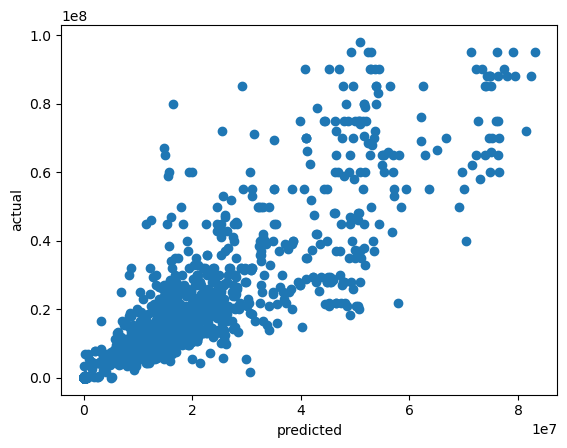

In [17]:
NN_pred = annRegressor.predict(X_test)
plt.scatter(NN_pred, Y_test)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [18]:
# Method to display model evaluation metrics
def display_model_metrics(label, predictions):
    # The mean absolute error
    print("Mean absolute error: %.4f\n" % mean_absolute_error(label, predictions))

    # The mean squared error
    print("Root mean squared error: %.4f\n" % np.sqrt(mean_squared_error(label, predictions)))

    # The coefficient of determination: 1 is perfect prediction R^2
    print("Coefficient of determination: %.4f\n" % r2_score(label, predictions))

predictions = annRegressor.predict(X_test)
display(Y_test)
display(predictions)

display_model_metrics(Y_test, predictions[:,-1])

73/73 [==============================] - 0s 3ms/step


1421       45000.0
4190    14500000.0
972       120000.0
1790      240000.0
530       250000.0
           ...    
2429       35500.0
6808    15500000.0
5068     8500000.0
3800    18500000.0
5238    18500000.0
Name: price, Length: 2306, dtype: float64

array([[   84002.6 ],
       [19093044.  ],
       [   66485.68],
       ...,
       [10605082.  ],
       [24719938.  ],
       [23292654.  ]], dtype=float32)

Mean absolute error: 3821994.2500

Root mean squared error: 8205474.0000

Coefficient of determination: 0.8137



In [19]:
import pickle

In [20]:
pickle.dump(annRegressor, open('models/model.pkl', 'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_10
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...layers\dense_4
......vars
.........0
.........1
...layers\dense_5
......vars
.........0
.........1
...layers\dense_6
......vars
.........0
.........1
...layers\dense_7
......vars
.........0
.........1
...layers\dense_8
......vars
.........0
.........1
...layers\dense_9
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........21
.........22
.........23
.........24
.........25
.........26
.........27
.........28
.........29
.........3
.........30
.....